In [ ]:
#dataset:= tesla data---https://www.kaggle.com/ernesternest/time-series-analysis-of-s-p-500-companies/data

# Importing required libraries 

In [2]:
#checking directory 
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [3]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Data Loading 


In [4]:
#loading all the dataset that is used for analysis 
stocks=pd.read_csv('/content/drive/MyDrive/stocks.csv',parse_dates=['date'])

In [5]:
stocks.head() #visualizing stock dataset 

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
stocks.shape #shape of the dataset

(619040, 7)

In [7]:
len(stocks['Name'].unique())

505

In [8]:
stocks.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [9]:
stocks=stocks.fillna(stocks.mean())

In [28]:
#checking the American Airlines Group Inc.stock
data=stocks.loc[stocks.Name=='AAL', :]

In [29]:
df1=stocks.loc[stocks.Name=='AAPL',:]
df2=stocks.loc[stocks.Name=='AAL',:]
df3=stocks.loc[stocks.Name=='AAP',:]
df4=stocks.loc[stocks.Name=='ABBV',:]
df5=stocks.loc[stocks.Name=='ABC',:]
df6=stocks.loc[stocks.Name=='ABT',:]
df=pd.concat([df1, df2, df3, df4, df5, df6])

# Time series analysis 

In [30]:
df.head()

,date,open,high,low,close,volume,Name,lag
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.2200
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,16.4542
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,0.7072
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-1.7186
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.1272


In [31]:
#opening values for the American Airlines Group Inc.stock
fig=px.line(data, x='date', y='open')
fig.show()

In [32]:
df['year'] = df['date'].dt.year

In [33]:
df.shape

(7554, 9)

In [34]:
stocks=stocks.drop(columns=['date'], axis=1)

In [35]:
#Using the scatter plot to see the values of the various stock prices of the dataset
fig=px.scatter(df, x='low',y='high', animation_frame='year',animation_group="Name",
           size="close", color="Name")
fig.show()

In [ ]:
#data analysis on the stock of various companies 
stock_data = px.data.stocks(indexed=True)-1
stock_fig = px.area(stock_data, facet_col="company", facet_col_wrap=2)
stock_fig.show()

In [36]:
stocks.describe().T #describing the data

,count,mean,std,min,25%,50%,75%,max
open,619040.0,8.302333e+01,9.737790e+01,1.62,40.220,62.59,9.437000e+01,2.044000e+03
high,619040.0,8.377831e+01,9.820688e+01,1.69,40.620,63.15,9.518000e+01,2.067990e+03
low,619040.0,8.225610e+01,9.650680e+01,1.50,39.830,62.02,9.353538e+01,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,9.441000e+01,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4.284509e+06,6.182376e+08
lag,619040.0,9.453347e-05,4.802879e+00,-1845.37,-0.400,0.03,4.800000e-01,6.613500e+02


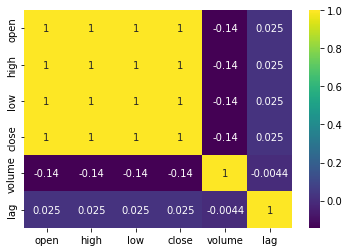

In [37]:
sns.heatmap(stocks.corr(), annot=True, cmap='viridis') #Correlation between the attributes of the dataset

In [38]:
AAL=data[data['date']>='2017-01-01']

In [39]:
AAL=AAL.set_index('date')

In [40]:
values_AAL = AAL.loc[:,['open']]

In [41]:
from pandas.tseries.offsets import DateOffset

In [42]:
values_AAL.head()

,open
date,
2017-01-03,47.28
2017-01-04,46.63
2017-01-05,46.52
2017-01-06,45.85
2017-01-09,46.01


In [43]:
values_AAL.shape

(277, 1)

In [44]:
def predict_future_data(val):
    date = [val.index[-1]+ DateOffset(days = i) for i in range(0,30)]
    df = pd.DataFrame(index=date[1:],columns = val.columns)
    return df

In [45]:
d_AAL=pd.concat([values_AAL, predict_future_data(values_AAL)])

In [46]:
import statsmodels.api as sm

In [47]:
def statsmodel_for_predicting_future(values,data):
    smmodel=sm.tsa.statespace.SARIMAX(values['open'],order=data,seasonal_order=(3,2,4,12))
    outcome=smmodel.fit()
    return outcome

In [48]:
AALvalues=statsmodel_for_predicting_future(d_AAL,data=(3,1,4))
d_AAL['Forecast'] = AALvalues.predict(start = 78 ,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



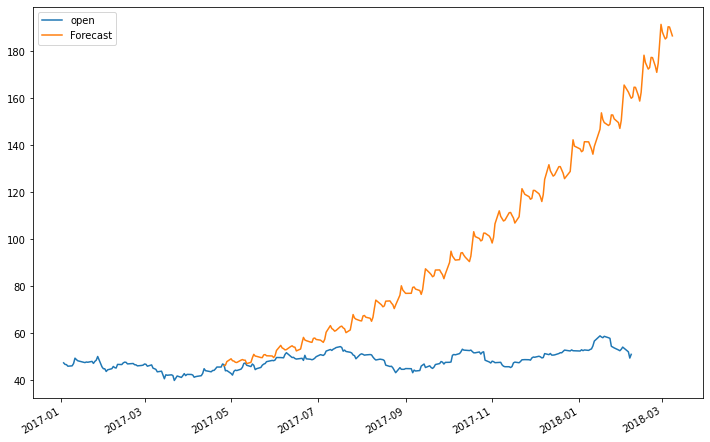

In [49]:
d_AAL[['open','Forecast']].plot(figsize=(12,8)) #predicting future data

In [50]:
#Rolling average analysis 
sales=df[['volume', 'year']]

In [51]:
sales['avg_volume']=sales.mean(axis=1)

In [52]:
sales=sales.drop(['volume'], axis=1)

In [53]:
#Simple moving average for 10 or 20 years 
sales["MA10"]=sales.avg_volume.rolling(10, min_periods=1).mean()
sales["MA20"]=sales.avg_volume.rolling(20, min_periods=1).mean()

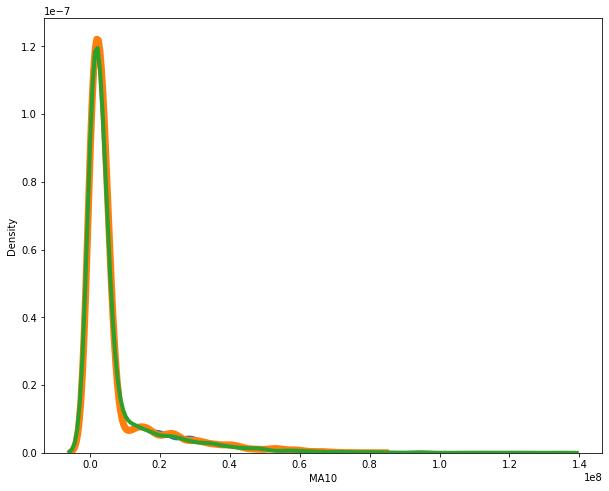

In [54]:
#Plotting the 10 or 0 year average of the AAL sales volume
plt.figure(figsize=(10,8))
sns.kdeplot(x='MA10', data=sales, linewidth=3)
sns.kdeplot(x='MA20', data=sales,  linewidth=7)
sns.kdeplot(x='avg_volume', data=sales,  linewidth=4)

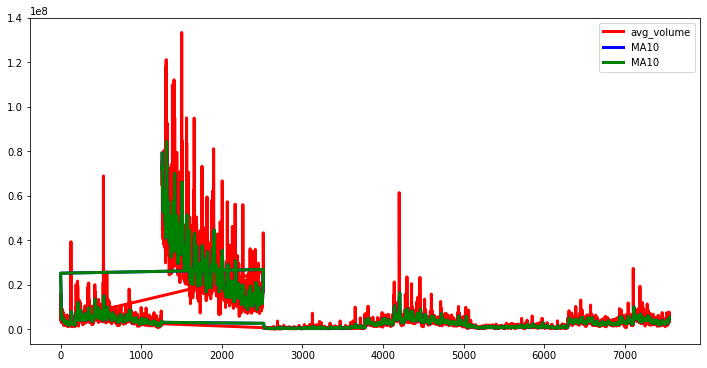

In [55]:
sales[['avg_volume', 'MA10', 'MA10']].plot(color=['red', 'blue', 'green'],linewidth=3, figsize=(12,6))

In [56]:
#Exponential moving average 
sales["EA1"]=sales.avg_volume.ewm(alpha=0.1, adjust=False).mean()
sales["EA2"]=sales.avg_volume.ewm(alpha=0.3, adjust=False).mean()

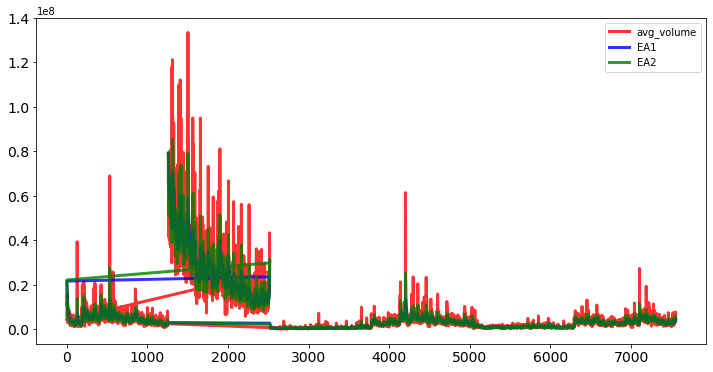

In [57]:
sales[['avg_volume', 'EA1', 'EA2']].plot(color=['red', 'blue', 'green'],linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
#libraries for creating the models
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from keras.models import load_model
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [14]:
stocks.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
lag       0
dtype: int64

In [15]:
values=['open','high','low','volume']
var=pd.DataFrame(stocks['close'])

In [16]:
minscale = MinMaxScaler()
trans_feature = minscale.fit_transform(stocks[values])
trans_feature= pd.DataFrame(columns=values, data=trans_feature, index=stocks.index)
trans_feature.head()

,open,high,low,volume
0,0.006585,0.006500,0.006456,0.013599
1,0.006497,0.006446,0.006275,0.014367
2,0.006282,0.006204,0.006196,0.013144
3,0.006208,0.006412,0.006270,0.016595
4,0.006522,0.006422,0.005734,0.051566


In [17]:
trans_feature.shape

(619040, 4)

In [18]:
#Splitting dataset into traning and testing using time series split.
splitdata=TimeSeriesSplit(n_splits=10)
for train, test in splitdata.split(trans_feature):
  X_train,X_test=trans_feature[:len(train)], trans_feature[len(train): (len(train)+len(test))]
  Y_train, Y_test= var[:len(train)].values.ravel(), var[len(train):(len(train)+len(test))].values.ravel()

In [19]:
#Converting the dimesions of the dataset 
train_X=np.array(X_train)
test_X=np.array(X_test)
X_train=train_X.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test=test_X.reshape(X_test.shape[0], 1, X_test.shape[1])

In [20]:
train_X.shape

(562764, 4)

In [21]:
X_train.shape

(562764, 1, 4)

#Static autoregressive model

In [ ]:
#!pip install statsmodels==0.9.0rc1

In [10]:
#Static autoregressive model
#pip install statsmodels --upgrade
st = stocks.close.diff().fillna(0)
lag = st.shift(1).fillna(0)
stocks["lag"] = lag

In [11]:
#Static autoregressive model
import statsmodels.api as sm
y = stocks["close"].iloc[-13:]
x = stocks["lag"].iloc[-13:]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     8.321
Date:                Thu, 23 Dec 2021   Prob (F-statistic):             0.0148
Time:                        18:07:37   Log-Likelihood:                -24.501
No. Observations:                  13   AIC:                             53.00
Df Residuals:                      11   BIC:                             54.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4000      0.490    157.931      0.0

#Machine learning model 

#Random forest Classifier

In [22]:
#Random forest 
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
random_forest_classfier= RandomForestClassifier(criterion = 'entropy', random_state = 42)
random_forest_classfier.fit(train_X[:20000], Y_train.astype('int')[:20000])

RandomForestClassifier(criterion='entropy', random_state=42)

In [23]:
# Evaluating on Testing set
predicted_values = random_forest_classfier.predict(test_X)

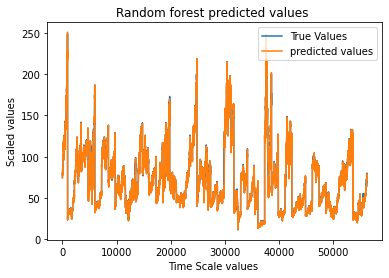

In [24]:
plt.plot(Y_test, label="True Values")
plt.plot(predicted_values, label='predicted values')
plt.title("Random forest predicted values ")
plt.xlabel('Time Scale values ')
plt.ylabel('Scaled values')
plt.legend()
plt.show()

#Decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
decsion_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decsion_tree.fit(train_X[:20000], Y_train.astype('int')[:20000])

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
predictedvalues =decsion_tree.predict(test_X)

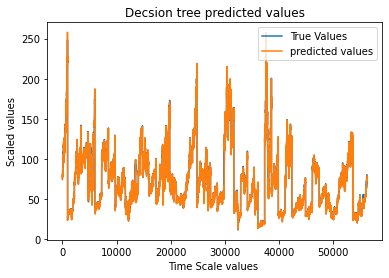

In [27]:
plt.plot(Y_test, label="True Values")
plt.plot(predictedvalues, label='predicted values')
plt.title("Decsion tree predicted values")
plt.xlabel('Time Scale values ')
plt.ylabel('Scaled values')
plt.legend()
plt.show()

#Deep Learning Model 

In [ ]:
#Building model for time series data
model_lstm = Sequential()
model_lstm(LSTM(32, input_shape=(1, train_X.shape[1]), 
                activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

Consider rewriting this model with the Functional API.


In [ ]:
model_lstm.build(input_shape=(1, train_X.shape[1])) 
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model_lstm.fit(X_train, Y_train, epochs=100, 
                 batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
70346/70346 [==============================] - 90s 1ms/step - loss: 13434.9473
Epoch 2/100
70346/70346 [==============================] - 87s 1ms/step - loss: 9789.8848
Epoch 3/100
70346/70346 [==============================] - 84s 1ms/step - loss: 8802.3418
Epoch 4/100
70346/70346 [==============================] - 83s 1ms/step - loss: 8304.6387
Epoch 5/100
70346/70346 [==============================] - 85s 1ms/step - loss: 7895.8071
Epoch 6/100
70346/70346 [==============================] - 82s 1ms/step - loss: 7513.8262
Epoch 7/100
70346/70346 [==============================] - 82s 1ms/step - loss: 7145.8311
Epoch 8/100
70346/70346 [==============================] - 84s 1ms/step - loss: 6788.3540
Epoch 9/100
70346/70346 [==============================] - 84s 1ms/step - loss: 6440.6128
Epoch 10/100
70346/70346 [==============================] - 84s 1ms/step - loss: 6102.4312
Epoch 11/100
70346/70346 [==============================] - 84s 1ms/step - loss: 5773.9141
Epoch 1

In [ ]:
predict_values= model_lstm.predict(X_test)

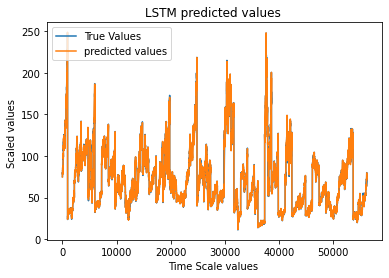

In [ ]:
#visulising the predicted and true values 
plt.plot(Y_test, label="True Values")
plt.plot(predict_values, label='predicted values')
plt.title("LSTM predicted values ")
plt.xlabel('Time Scale values ')
plt.ylabel('Scaled values ')
plt.legend()
plt.show()

In [58]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Task_final.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Task_final.ipynb to html
[NbConvertApp] Writing 1040318 bytes to /content/drive/MyDrive/Colab Notebooks/Task_final.html
